## Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Cleaning

- Use Pandas to import the data from `"fcc-forum-pageviews.csv"`.
- Set the index to the `date` column.
- Clean the data by filtering out days when the page views were in the `top 2.5% of the dataset` or `bottom 2.5% of the dataset`.

In [30]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date']).set_index('date')

#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df.value <= df.value.quantile(0.975)) & (df.value >= df.value.quantile(0.025))]

## Draw Line Plot
- Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to `"examples/Figure_1.png"`. 
- The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`.
- The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

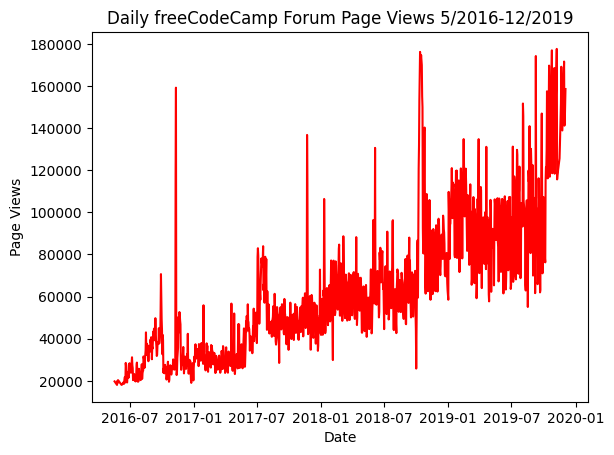

In [54]:
# Draw line plot
fig = plt.figure()
plt.plot(df.index, df.value, color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

# Save image and return fig
fig.savefig('line_plot.png')

## Draw Bar Plot
- Create a `draw_bar_plot` function that draws a bar chart similar to `"examples/Figure_2.png"`.
- It should show average daily page views for each month grouped by year.
- The legend should show month labels and have a title of `Months`.
- On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

In [143]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack(level='month')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

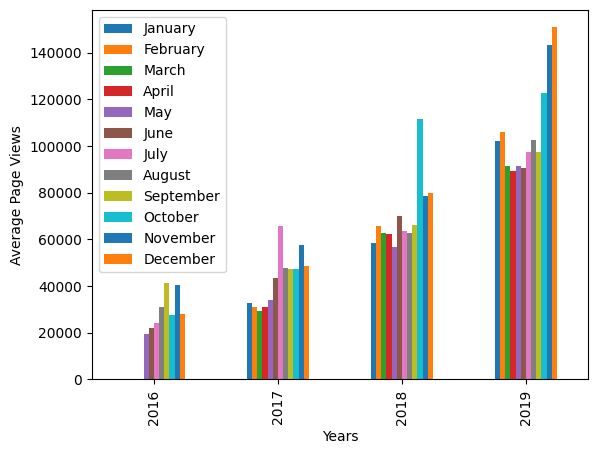

In [152]:
# Draw bar plot
fig = df_bar.plot.bar().figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(month_names)
plt.show()

# Save image and return fig
fig.savefig('bar_plot.png')

## Draw Box Plot
- Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to `"examples/Figure_3.png"`.
- These box plots should show how the values are distributed within a given year or month and how it compares over time.
- The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`.
- Make sure the month labels on bottom start at `Jan` and the x and y axis are labeled correctly.

`The boilerplate includes commands to prepare the data.`

In [190]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_order = [month[:3] for month in month_names]

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

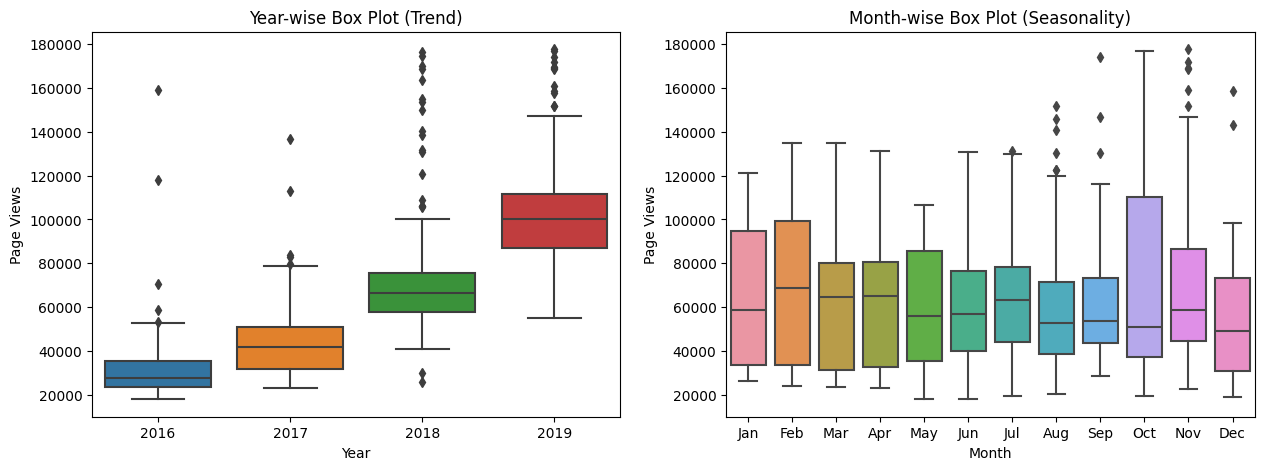

In [192]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=month_order)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()

# Save image and return fig
fig.savefig('box_plot.png')